Преподаватель: Артур Сапрыкин
**Домашнее задание. **

Необходимо запустить практическую часть занятия - файл находится в материалых, и посмотреть самому то, о чём говорили на лекции.
По образу практики, попробуйте создать искусственный датасет с лишними столбцами.
Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель.
Ориентируйтесь на то, что было показано во время занятия, и каждый шаг описывайте в markdown.
Здесь важно видеть ваш ход мысли. Не бойтесь ошибиться или написать не то. Данное задание не имеет какого-то “правильного” решения. Цель - достичь базового понимания проблемы. Чем больше вы фантазируете, тем лучше :) Тем не менее, старайтесь представить те ситуации, которые по-вашему мнению могли бы быть в реальных данных. Успеха!

In [332]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.linear_model import LinearRegression

# Создаём сэмпл

In [333]:
# Моделируем многомерные данные, используя встроенный датчик случайных чисел
dep = ['Сокол','Войковский','Хорошево','Митино']   # районы города
pd.options.display.float_format = '{:,.2f}'.format # формат вывода в pandas
# np.set_printoptions(precision=2,suppress=True )  # формат вывода в numpy
n_samples = 150                                    # длина рядов данных
age_owner = np.random.choice(100, n_samples) + 50  # возраст объекта недвижимости
length = np.random.choice(100, n_samples) + 100    # длина
width = np.random.choice(100, n_samples) + 100     # ширина
depart = np.random.choice(dep, n_samples)          # моделирование районов города
consta = 100
price = (length + width )/ age_owner + consta  # цена объекта недвижимости - целевая функция
                                                   # датафрейм - данные об объектах недвижимости:
data = pd.DataFrame({'depart':depart,'age_owner': age_owner, 'length': length, 'width': width, 'price': price})
data.head()

,depart,age_owner,length,width,price
0,Хорошево,120,171,125,102.47
1,Сокол,59,101,161,104.44
2,Хорошево,95,163,195,103.77
3,Войковский,52,121,149,105.19
4,Войковский,94,100,163,102.80


# Оцениваем основные статистические характеристики данных 

In [334]:
# оцениваем основные статистические характеристики данных об объектах недвижимости
data.describe()

,age_owner,length,width,price
count,150.00,150.00,150.00,150.00
mean,99.09,146.33,148.12,103.22
std,27.59,29.67,27.73,1.02
min,52.00,100.00,100.00,101.51
25%,76.00,121.25,123.50,102.46
50%,98.00,146.00,150.00,102.93
75%,121.00,169.75,171.50,103.80
max,149.00,199.00,199.00,106.28


# Оценка корреляционной матрицы данных

In [335]:
# оценка корреляционной матрицы данных
data.corr()

,age_owner,length,width,price
age_owner,1.00,0.12,0.04,-0.87
length,0.12,1.00,-0.02,0.19
width,0.04,-0.02,1.00,0.25
price,-0.87,0.19,0.25,1.00


# Попарные графики для выборок, а также частотные графики на главной диагонали с помощью метода pairplot

Можно заметить, что признаки равномерно распределены, а целевая функция имеет распределение отличное от равномерного.

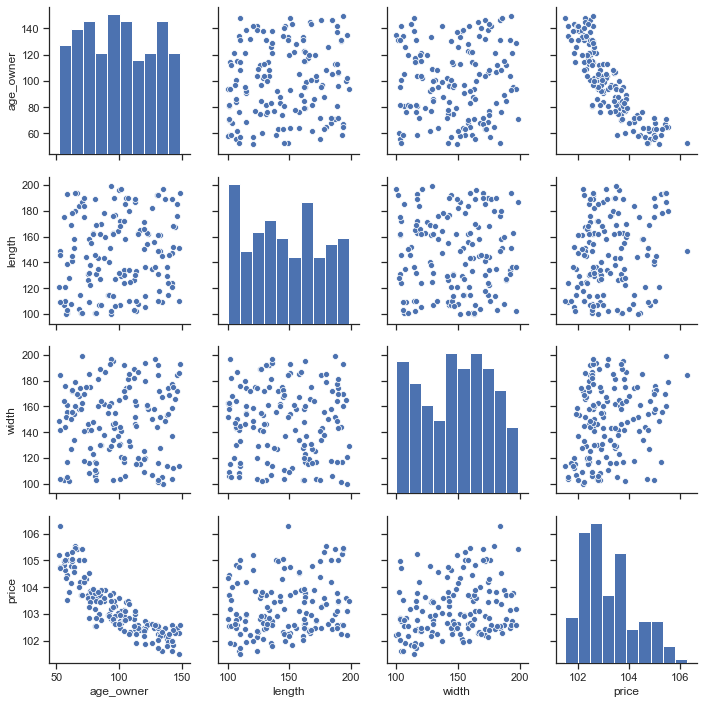

In [336]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

# Классификационный анализ всех выборок попарно с помощью параметра hue, где мы указываем наименование классов

В данном случае классификация ничего не дает. Графики показывают, что данные практически равномерно распределены и  цена на недвижимость не зависит от района города.

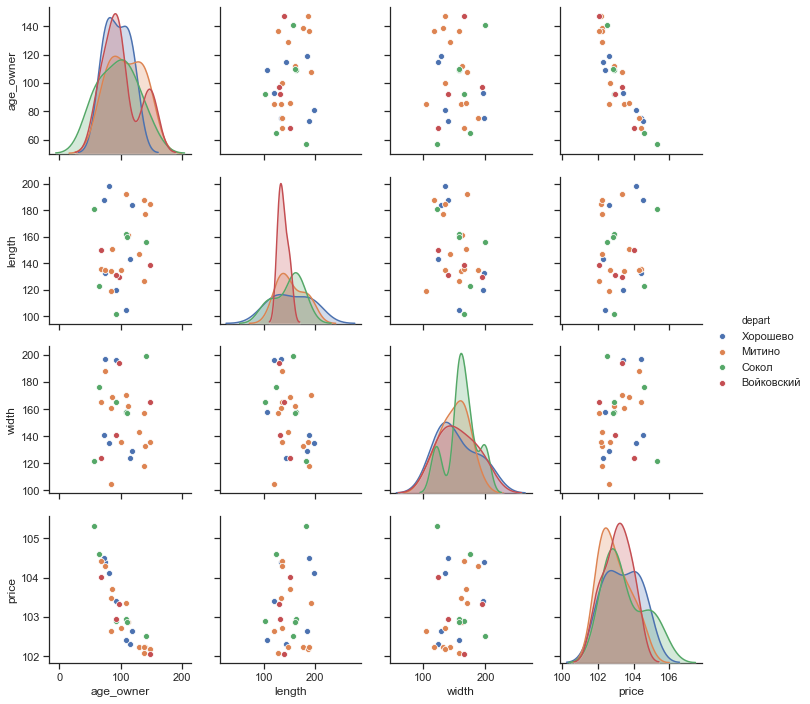

In [322]:
fig = sns.pairplot(data=data, hue='depart')
plt.show()

In [338]:
# sns.regplot(x=data[['age_owner']], y=y, data=data, fit_reg=True)

In [339]:
# sns.regplot(x=data[['length']], y=y,data=data, fit_reg=True)

# Линейные регрессионные модели

Предположим, что цена недвижимости (price) зависит линейно от рассматриваемых признаков (age_owner;	length;	width). 

Строим линейную регрессионую модель - y = A*X + b
  
A = reg.coef_ - это веса признаков (или параметры модели влияния факторов);
b = reg.intercept_

**Учет всех наших признаков в построении линейной регрессионной модели позволяет получить результаты моделирования (в данном случае) с ошибкой в 7%**

In [342]:
# учет всех признаков 

from sklearn.metrics import mean_absolute_error

X = data[['age_owner', 'length', 'width']]
y = data['price']

reg = LinearRegression().fit(X, y)

print('веса признаков: {}'.format(reg.coef_))
print('сдвиг модели: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['age_owner', 'length', 'width']])

print('абсолютная ошибка: {}'.format(mean_absolute_error(pred_values, y)))
print('относительная ошибка линейной регрессионной модели для трех признаков:',1-reg.score(X,y))

веса признаков: [-0.03  0.01  0.01]
сдвиг модели: 103.43817920608201
абсолютная ошибка: 0.22188153529245133
относительная ошибка линейной регрессионной модели для трех признаков: 0.06819199556011413


In [341]:
#length = data['length']
#width = data['width']
#sns.set(style="white", color_codes=True)
#g = sns.jointplot(x=length, y=width, data=data, kind='reg')
# plt.show()

**Если из рассмотрения исключить признак age_owner, то ошибка моделирования возрастет почти до 19,6%**

In [356]:
# Из рассмотрения исключили признак age_owner, то ошибка моделирования возрастет до 19,6%

X = data[['length', 'width']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['length', 'width']])
# print('Error: {}'.format(mean_absolute_error(pred_values, y)))
print('абсолютная ошибка: {}'.format(mean_absolute_error(pred_values, y)))
delta = pred_values - y
eps = mean_absolute_error(pred_values, y)/(max(delta)-min(delta))
print('относительная ошибка линейной регрессионной модели для двух признаков: ', eps)

Weights: [0.01 0.01]
Bias: 100.82962171323436
абсолютная ошибка: 0.8009655099445941
относительная ошибка линейной регрессионной модели для двух признаков:  0.19649289799766081


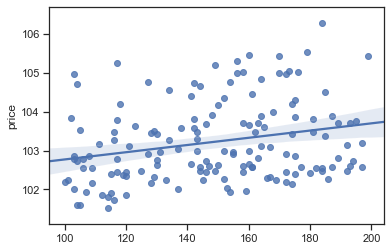

In [345]:
# линейная регрессия целевой характеристики - price от признака - width
sns.regplot(x=data[['width']], y=y,data=data, fit_reg=True)

**Создаем новый признак. Ошибка моделирования с учетом двух признаков (mult, age_owner) незначительно понизится до 14%**

In [349]:
# Создаем новый признак
data['mult'] = data['length'] * data['width']
data.head(5)

,depart,age_owner,length,width,price,mult
0,Хорошево,120,171,125,102.47,21375
1,Сокол,59,101,161,104.44,16261
2,Хорошево,95,163,195,103.77,31785
3,Войковский,52,121,149,105.19,18029
4,Войковский,94,100,163,102.80,16300


In [354]:
X = data[['age_owner','mult']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['age_owner','mult']])
print('абсолютная ошибка: {}'.format(mean_absolute_error(pred_values, y)))
delta = pred_values - y
eps = mean_absolute_error(pred_values, y)/(max(delta)-min(delta))
print('относительная ошибка', eps)

Weights: [-0.03  0.  ]
Bias: 105.0439551059647
абсолютная ошибка: 0.2194285003977734
относительная ошибка 0.13963402014989756


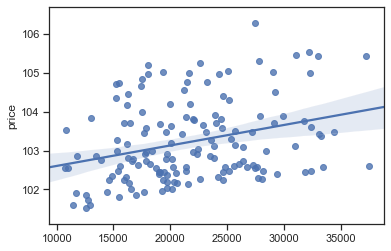

In [353]:
# линейная регрессия целевой характеристики - price от нового признака - mult=length*width
sns.regplot(x=data[['mult']], y=y,data=data, fit_reg=True)

**Ошибка моделирования с учетом только нового признака  ('mult') практически сохранится на том же уровне (19%) как и при учете двух признаков: 'length', 'width'**

In [357]:
X = data[['mult']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['mult']])
print('абсолютная ошибка: {}'.format(mean_absolute_error(pred_values, y)))
delta = pred_values - y
eps = mean_absolute_error(pred_values, y)/(max(delta)-min(delta))
print('относительная ошибка при учете нового признака', eps)

Weights: [0.]
Bias: 102.07689584481315
абсолютная ошибка: 0.8033836816597828
относительная ошибка при учете нового признака 0.19066173096644862
